<a href="https://colab.research.google.com/github/ozturkc/Machine-Learning/blob/master/Karar_Agaci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#GPU kullanmak için kimlik doğrulama işlemi
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import os
os.chdir("/gdrive/My Drive/SME/")

In [ ]:
!pwd

/gdrive/My Drive/SME


In [ ]:
!ls

'Karar_Agaci.ipynb adlı dosyanın kopyası'   ML-Dataset_2021.xlsx
'logit.ipynb adlı dosyanın kopyası'


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz 
import pydotplus

In [ ]:
from IPython.display import Image  
from sklearn.tree import export_graphviz

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_boston
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import RFE

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, fbeta_score
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import auc, roc_auc_score, roc_curve

In [ ]:
# Verinin yüklenmesi, eğitim ve test verileri olarak ayrılması
data = pd.read_excel("ML-Dataset_2021.xlsx")

In [ ]:
data

,Driver_StrenghtEnvironment,Driver_AccessFinance,Driver_QualitySupport,Driver_AccessCollaboration,Driver_AvailabilityStaff,Driver_AvailabilitySupport,Driver_LegalEnvironement,Driver_Infrastructure,Number_GreenPractices,High_Involvement_Green
0,4,3,4,3,4,3,4,3,1,0
1,3,2,3,2,3,1,3,2,4,1
2,2,2,3,3,2,2,3,2,0,0
3,2,3,1,3,1,2,1,3,3,1
4,3,3,2,3,2,2,3,3,1,0
...,...,...,...,...,...,...,...,...,...,...
506,3,3,4,4,2,3,3,4,1,0
507,4,4,4,4,4,4,2,3,2,0
508,4,4,4,3,4,3,3,3,0,0
509,4,2,3,3,4,4,3,4,0,0


In [ ]:
X = data.iloc[:, :8].values #bağımsız değişkenler
y = data.iloc[:, 8].values #bağımlı değişken

In [ ]:
for i in range(0, 511):
  if y[i]>0:
    y[i]=1

In [ ]:
X_egitim, X_test, y_egitim, y_test = train_test_split(X, y, 
                                                      test_size = 0.3, 
                                                      random_state=3)

In [ ]:
X1 = data.iloc[:, :8]
X1

,Driver_StrenghtEnvironment,Driver_AccessFinance,Driver_QualitySupport,Driver_AccessCollaboration,Driver_AvailabilityStaff,Driver_AvailabilitySupport,Driver_LegalEnvironement,Driver_Infrastructure
0,4,3,4,3,4,3,4,3
1,3,2,3,2,3,1,3,2
2,2,2,3,3,2,2,3,2
3,2,3,1,3,1,2,1,3
4,3,3,2,3,2,2,3,3
...,...,...,...,...,...,...,...,...
506,3,3,4,4,2,3,3,4
507,4,4,4,4,4,4,2,3
508,4,4,4,3,4,3,3,3
509,4,2,3,3,4,4,3,4


In [ ]:
y

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,

Konf matrix:  [[  0  25]
 [  1 128]]
1. Regresyon ağacı için eğitim performansı: 0.8571428571428571
1. Regresyon ağacı için test performansı:  0.8311688311688312


[Text(496.0, 440.31600000000003, 'X[4] <= 3.5\nentropy = 0.627\nsamples = 100.0%\nvalue = [0.157, 0.843]'),
 Text(186.0, 342.468, 'X[7] <= 1.5\nentropy = 0.573\nsamples = 82.6%\nvalue = [0.136, 0.864]'),
 Text(124.0, 244.62, 'entropy = 0.0\nsamples = 2.5%\nvalue = [0.0, 1.0]'),
 Text(248.0, 244.62, 'X[7] <= 3.5\nentropy = 0.584\nsamples = 80.1%\nvalue = [0.14, 0.86]'),
 Text(124.0, 146.772, 'X[3] <= 2.5\nentropy = 0.638\nsamples = 55.5%\nvalue = [0.162, 0.838]'),
 Text(62.0, 48.924000000000035, '\n  (...)  \n'),
 Text(186.0, 48.924000000000035, '\n  (...)  \n'),
 Text(372.0, 146.772, 'X[1] <= 2.5\nentropy = 0.439\nsamples = 24.6%\nvalue = [0.091, 0.909]'),
 Text(310.0, 48.924000000000035, '\n  (...)  \n'),
 Text(434.0, 48.924000000000035, '\n  (...)  \n'),
 Text(806.0, 342.468, 'X[1] <= 2.5\nentropy = 0.824\nsamples = 17.4%\nvalue = [0.258, 0.742]'),
 Text(682.0, 244.62, 'X[3] <= 3.5\nentropy = 0.996\nsamples = 3.6%\nvalue = [0.538, 0.462]'),
 Text(620.0, 146.772, 'X[3] <= 2.5\nentropy

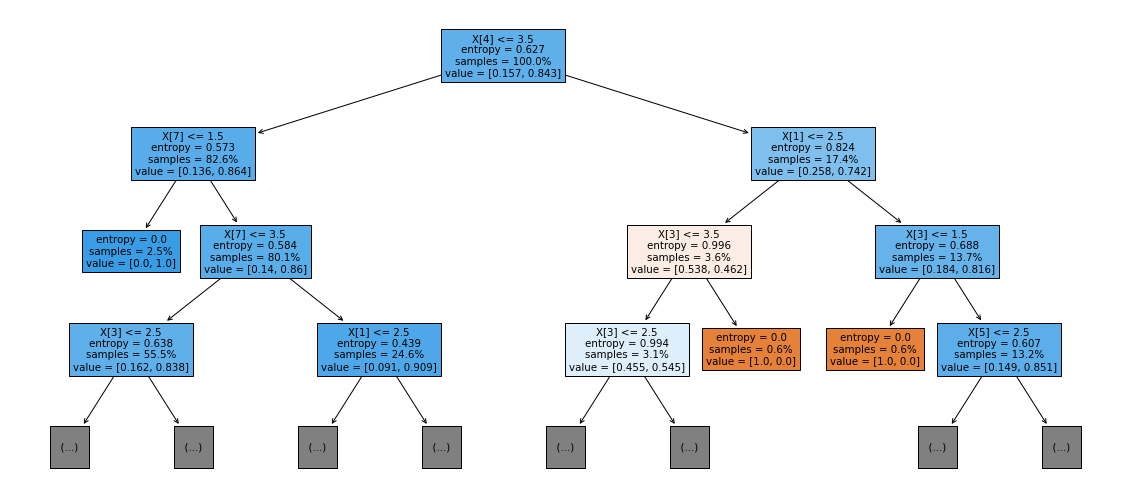

In [ ]:
# Karar Ağacı objesinin oluşturulması, eğitim verileriyle uydurulması, eğitim ve test verileri üzerinden performansının belirlenmesi 
clfTree = DecisionTreeClassifier(criterion = "entropy",
                                 splitter = "best",
                                 max_depth = 4,
                                 min_samples_leaf = 2,
                                 random_state = 3)


clfTree.fit(X_egitim, y_egitim)
clfTree_train_score = clfTree.score(X_egitim, y_egitim)
clfTree_test_score = clfTree.score(X_test, y_test)

tahmin_test = clfTree.predict(X_test)
cm = confusion_matrix(y_test, tahmin_test)
print("Konf matrix: ", cm)


print("1. Regresyon ağacı için eğitim performansı:", clfTree_train_score)
print("1. Regresyon ağacı için test performansı: ", clfTree_test_score)



fig = plt.figure(figsize = (20, 9))
tree.plot_tree(clfTree)
tree.plot_tree(clfTree, max_depth = 3, filled=True, proportion = True)


sınıflandırma raporu:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.84      0.99      0.91       129

    accuracy                           0.83       154
   macro avg       0.42      0.50      0.45       154
weighted avg       0.70      0.83      0.76       154

Hata matrisi:
 [[  0  25]
 [  1 128]]
Accuracy: 0.8311688311688312


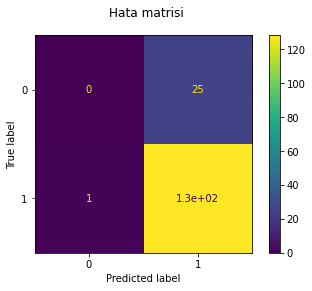

In [ ]:
print('sınıflandırma raporu:\n', 
      classification_report(y_test, tahmin_test))

gorsel = plot_confusion_matrix(clfTree, 
                               X_test,
                               y_test)
gorsel.figure_.suptitle("Hata matrisi")

print('Hata matrisi:\n', gorsel.confusion_matrix)



print("Accuracy:",metrics.accuracy_score(y_test, tahmin_test))

In [ ]:
print("acc", accuracy_score(y_test, tahmin_test))
print("prec", precision_score(y_test, tahmin_test))
print("rec", recall_score(y_test, tahmin_test))
print("f1", f1_score(y_test, tahmin_test))
print("f2", fbeta_score(y_test, tahmin_test, beta=2.0))

acc 0.8311688311688312
prec 0.8366013071895425
rec 0.9922480620155039
f1 0.9078014184397163
f2 0.9566517189835574


In [ ]:
feature_cols = ['StrenghtEnvironment', 'AccessFinance', 'QualitySupport', 'AccessCollaboration', 'AvailabilityStaff', 'AvailabilitySupport', 'LegalEnvironement', 'Infrastructure']

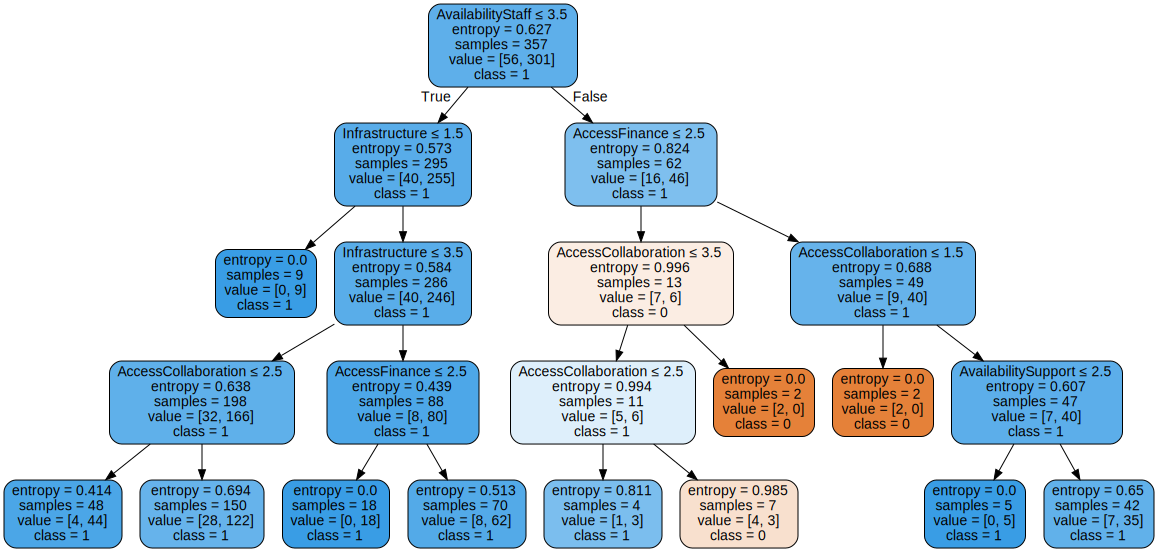

In [ ]:
dot_data = tree.export_graphviz(clfTree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 


dot_data = tree.export_graphviz(clfTree, out_file = None,  
                                filled = True, 
                                feature_names = feature_cols, 
                                class_names=['0','1'],
                                rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 


5-katlı ÇGS sonucu seçilen alfa değeri ile elde edilen tahmin doğruluğu: 0.8376623376623377
Konf matrix:  [[  0  25]
 [  0 129]]


[Text(558.0, 244.62, 'entropy = 0.627\nsamples = 100.0%\nvalue = [0.157, 0.843]')]

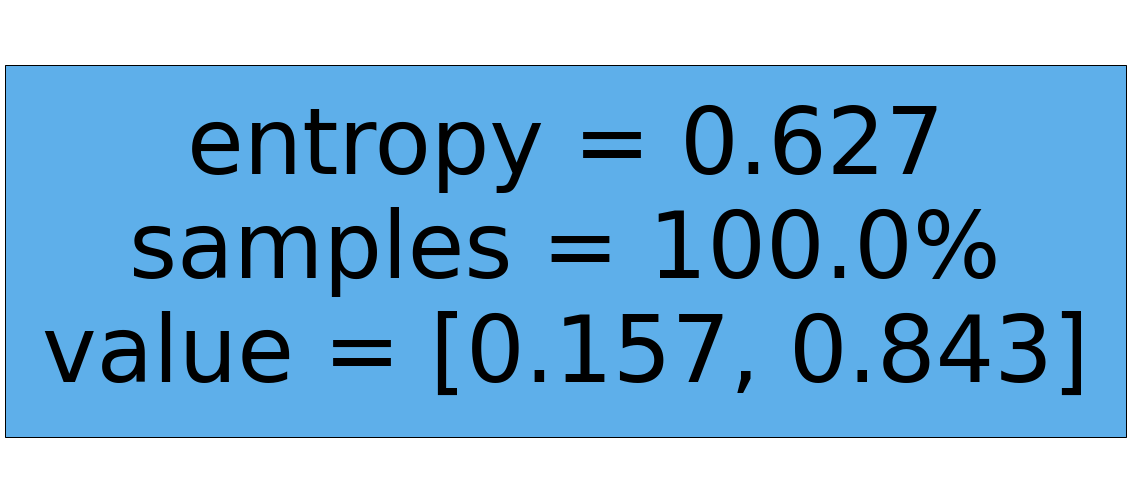

In [ ]:
# alfa hiperparametresinin çapraz geçerlilik sınaması ile belirlenmesi
hiperparametreler = np.linspace(0, 10, 100)
cv = KFold(n_splits = 5,
           shuffle = True,
           random_state = 3)


hiperparametre_dogruluk = []
for c in hiperparametreler:
    cv_dogruluk = []
    for eğitim_indisleri, dogrulama_indisleri in cv.split(X_egitim, y_egitim):
        agac = DecisionTreeClassifier(criterion = "entropy",
                                      splitter = "best",
                                      ccp_alpha = c,
                                      random_state = 3)
        agac.fit(X_egitim[eğitim_indisleri], y_egitim[eğitim_indisleri])
        dogruluk = agac.score(X_egitim[dogrulama_indisleri], y_egitim[dogrulama_indisleri])
        cv_dogruluk.append(dogruluk)
    cv_dogruluk = np.array(cv_dogruluk)
    hiperparametre_dogruluk.append(cv_dogruluk.mean())

best_alpha = hiperparametreler[np.argmax(hiperparametre_dogruluk)]
agac = DecisionTreeClassifier(criterion = "entropy",
                              ccp_alpha = best_alpha,
                              max_depth = 3,
                              random_state = 3).fit(X_egitim, y_egitim)
dogruluk = agac.score(X_test, y_test)
print("5-katlı ÇGS sonucu seçilen alfa değeri ile elde edilen tahmin doğruluğu:", dogruluk)

tahmin_test = agac.predict(X_test)
cm = confusion_matrix(y_test, tahmin_test)
print("Konf matrix: ", cm)

fig = plt.figure(figsize = (20, 9))
tree.plot_tree(agac)
tree.plot_tree(agac, max_depth = 3, filled=True, proportion = True)


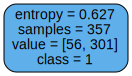

In [ ]:
dot_data = tree.export_graphviz(agac, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 


dot_data = tree.export_graphviz(agac, out_file=None,  
                                filled=True, feature_names = feature_cols, 
                                class_names=['0','1'],
                                rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
agac_train_score = agac.score(X_egitim, y_egitim)
agac_test_score = agac.score(X_test, y_test)

tahmin_test = agac.predict(X_test)
cm = confusion_matrix(y_test, tahmin_test)
print("Konf matrix: ", cm)


print("1. Regresyon ağacı için eğitim performansı:", agac_train_score)
print("1. Regresyon ağacı için test performansı: ", agac_test_score)

Konf matrix:  [[  0  25]
 [  0 129]]
1. Regresyon ağacı için eğitim performansı: 0.8431372549019608
1. Regresyon ağacı için test performansı:  0.8376623376623377


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


sınıflandırma raporu:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.84      1.00      0.91       129

    accuracy                           0.84       154
   macro avg       0.42      0.50      0.46       154
weighted avg       0.70      0.84      0.76       154

Hata matrisi:
 [[  0  25]
 [  0 129]]
Accuracy: 0.8376623376623377


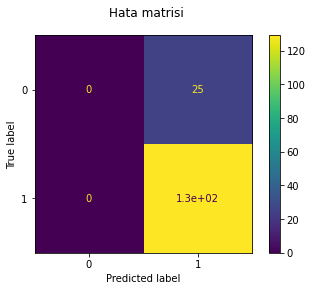

In [ ]:
print('sınıflandırma raporu:\n', 
      classification_report(y_test, tahmin_test))

gorsel = plot_confusion_matrix(agac, 
                               X_test,
                               y_test)
gorsel.figure_.suptitle("Hata matrisi")

print('Hata matrisi:\n', gorsel.confusion_matrix)



print("Accuracy:",metrics.accuracy_score(y_test, tahmin_test))

In [ ]:
print("acc", accuracy_score(y_test, tahmin_test))
print("prec", precision_score(y_test, tahmin_test))
print("rec", recall_score(y_test, tahmin_test))
print("f1", f1_score(y_test, tahmin_test))
print("f2", fbeta_score(y_test, tahmin_test, beta=2.0))

acc 0.6659486329743165
prec 0.5845386533665835
rec 0.49766454352441614
f1 0.5376146788990825
f2 0.5129102844638949


In [ ]:
cgs = KFold(n_splits=10) # 10 katlı çapraz geçerlilik sınaması objesinin yaratılması

agac = DecisionTreeClassifier(criterion = 'entropy') # torbalamada ve AdaBoost'ta kullanılacak karar ağacı objesinin yaratılması


In [ ]:
rastgele_ormanlar = RandomForestClassifier(n_estimators = 5, 
                                           max_features = 3) # her ağaçta maksimum 3 öznitelik kullanılarak 5 farklı ağaç oluşturan rastgele ormanlar objesinin yaratılması
rastgele_ormanlar_performans = cross_val_score(rastgele_ormanlar, X, y, cv = cgs) # yaratılan 10 katlı çapraz geçerlilik sınaması ile rastgele ormanlar modelinin performansının kaydedilmesi
print('Rastgele ormanlar performansı:', rastgele_ormanlar_performans.mean())

Rastgele ormanlar performansı: 0.7904977375565612


In [ ]:
torbalama = BaggingClassifier(base_estimator = agac, 
                              n_estimators = 5) # agac objesinin kullanılarak torbalama modelinin kurulması
torbalama_performans = cross_val_score(torbalama, X, y, cv = cgs) # yaratılan 10 katlı çapraz geçerlilik sınaması ile torbalama modelinin performansının kaydedilmesi
print('Torbalama performansı:', torbalama_performans.mean())


Torbalama performansı: 0.7475113122171946


In [ ]:
adaboost = AdaBoostClassifier(base_estimator = agac, n_estimators=1000) # agac objesini kullanarak maksimüm 1000 döngü ile eğitilecek AdaBoost objesinin yaratılması
adaboost_performans = cross_val_score(adaboost, X, y, cv = cgs) # yaratılan 10 katlı çapraz geçerlilik sınaması ile AdaBoost modelinin performansının kaydedilmesi
print('Adaboost performansi:', adaboost_performans.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Adaboost performansi: 0.6260689468361388


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


dvm için sınıflandırma raporu:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.84      1.00      0.91       129

    accuracy                           0.84       154
   macro avg       0.42      0.50      0.46       154
weighted avg       0.70      0.84      0.76       154

Hata matrisi:
 [[  0  25]
 [  0 129]]


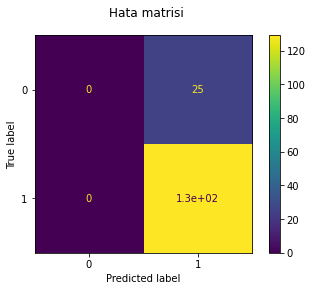

In [ ]:
# SVC 


# Model olusturma
dvm = SVC(C = 1, kernel = 'rbf')


# Modelin uydurulmasi
dvm.fit(X_egitim, y_egitim)

# Test verisinin tahminleri
tahmin_test = dvm.predict(X_test)

print('dvm için sınıflandırma raporu:\n', 
      classification_report(y_test, tahmin_test))

gorsel = plot_confusion_matrix(dvm, 
                               X_test,
                               y_test)
gorsel.figure_.suptitle("Hata matrisi")

print('Hata matrisi:\n', gorsel.confusion_matrix)


In [ ]:
print("acc", accuracy_score(y_test, tahmin_test))
print("prec", precision_score(y_test, tahmin_test))
print("rec", recall_score(y_test, tahmin_test))
print("f1", f1_score(y_test, tahmin_test))
print("f2", fbeta_score(y_test, tahmin_test, beta=2.0))

acc 0.8376623376623377
prec 0.8376623376623377
rec 1.0
f1 0.911660777385159
f2 0.9626865671641792
